## <font color = blue >Compute the coefficient $k_i$ with respect to Hermite Chaos

In [31]:
import numpy as np
import numpy.polynomial.hermite_e as H  
from scipy.stats import norm
from scipy.stats import gaussian_kde as kde
from math import factorial
import scipy.integrate.quadrature as G_qua   #Gauss Quadrature
from matplotlib import pyplot as plt
from scipy.integrate import odeint

%matplotlib notebook

In [24]:
def Phi(n):
    #define H_n
    coeffs = [0]*(n+1)
    coeffs[n] = 1
    return coeffs

def expo_icdf(params):                                      
    return lambda u:-np.log(1-u)

###return the denominator when computing $k_i$
def inner2_herm(n):
    return factorial(n)

def product3_herm(i,j,l):
    #compute \Phi_i*\Phi_j*\Phi_l
    return lambda x: H.hermeval(x, H.hermemul(H.hermemul(Phi(i),Phi(j)),Phi(l))) 

def inner3_herm(P,i,j,l):
    #compute <\Phi_i\Phi_j\Phi_l>
    
    #Set up Gauss-Hermite quadrature, weighting function is exp^{-x^2}
    m=(P+1)**2
    x, w=H.hermegauss(m)        #x is point, w is the corresponding weight
    inner=sum([product3_herm(i,j,l)(x[idx]) * w[idx] for idx in range(m)])         
    
    return inner/np.sqrt(2*np.pi)   #because of the weight

############## Hermite Chaos ################
def coeff_herm(P,h):
    '''
    P is the highest degree of Hermite-Chaos we are gonna use
    h is the inverse pdf of k
    '''
    ki=[0]*(P+1)
        
    for i in range(0, P+1):
        #numerator
        function = lambda u:h(u)*H.hermeval(norm.ppf(u, loc=0, scale=1), Phi(i))     #Gauss quadrature
        num = G_qua(function,0,1)[0]
        #integrand=lambda u:h(u)*H.hermeval(norm.ppf(u, loc=0, scale=1), Phi(i))     ###norm.ppf
        #ki[i]=G_qua(h_phi_l(h,i), 0, 1)/inner2_herm(i)
        #ki[i]=trapezoid_int(integrand, 0.001, 1-0.001, 5000)/inner2_herm(i)
        ki[i] = num/inner2_herm(i)
    return ki  

## 6.3.1 Approximation of gamma distribution by Hermite Chaos
$$ f(k) = \frac{e^{-k} k^{\alpha}}{\Gamma(\alpha+1)}$$

Here assume $\alpha=0$, then $f(k) = e^{-k}$

Inverse CDF of $k$ is $h(u)$, here it is `expo_icdf([])`
$$ \zeta \sim N(0,1)$$
Inverse CDF of $\zeta$ is $l(u)$ which is indicated in `coeff_herm(P, h)`

[Wiki - Hermite Polynomial](https://en.wikipedia.org/wiki/Hermite_polynomials)

[Hermite Polynomial Python](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.polynomials.hermite_e.html)

$H_0(x) = 1$

$H_1(x) = x$

$H_2(x) = x^2 - 1$

$H_3(x) = x^3 - 3x$

$H_4(x) = x^4 - 6x^2 +3$

$\cdots$

$$ H_n(x) =(2x)^n \ _2F_0(-\frac{n}{2},-\frac{n-1}{2};;-\frac{1}{x^2})$$

In [14]:
h = expo_icdf([])                          
k_631 = coeff_herm(6,h)

/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.010561e-05
  AccuracyWarning)
/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 5.953355e-05
  AccuracyWarning)
/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.861170e-04
  AccuracyWarning)
/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.171238e-03
  AccuracyWarning)
/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.072197e-03
  AccuracyWarning)
/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceed

<IPython.core.display.Javascript object>


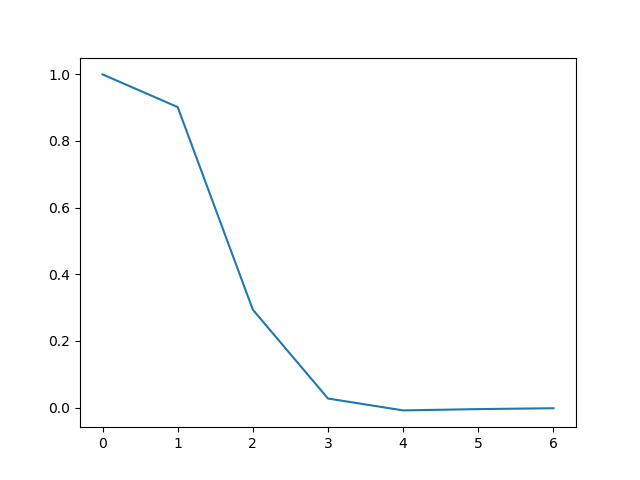

In [15]:
plt.figure()
plt.plot([0,1,2,3,4,5,6],k_631)

In [16]:
k_631_new = k_631
for i in range(7):
    k_631_new[i]*=(-1)**i

### <font color = red> After switching the sign, the plot is the same

<IPython.core.display.Javascript object>


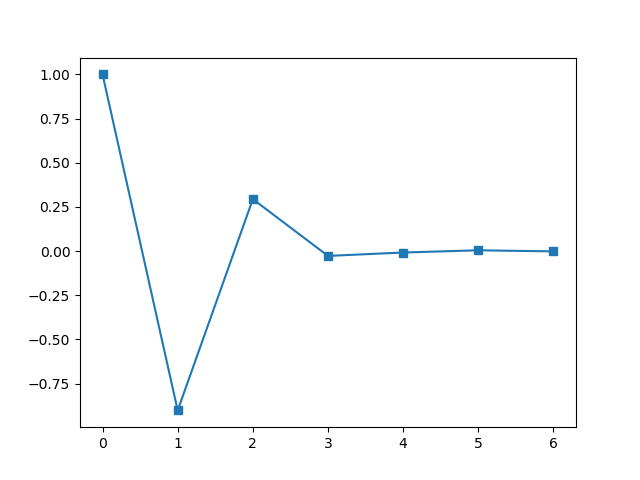

In [57]:
plt.figure()
plt.plot([0,1,2,3,4,5,6],k_631_new,'-s')

In [22]:
def ode_system_herm(y, t, P, a):   
    #P indicates the highest degree
    dydt = np.zeros(P+1) 
    for l in range(len(dydt)):
        dydt[l] = -(sum(sum(inner3_herm(P,i,j,l)*ki_herm[i]*y[j] for j in range(P+1)) for i in range(P+1)))/inner2_herm(l)
    return dydt

In [63]:
#N=5000
#S=np.random.normal(loc=0, scale=1, size=N)
y_631 = np.zeros((6,3))

h = expo_icdf([])                          #index k follows expo distr
a=0

for i in range(3):
    P=i*2+1
    ki_herm = coeff_herm(P, h)
    for j in range(P):
        ki_herm[j]*=(-1)**j
    y_mid=odeint(ode_system_herm, [1.0]+[0.0]*P, np.linspace(0,1,2), args=(P, a))[1,:] #return coeff in expansion of y(t)
    y_631[:,i] = y_mid.tolist()+[0]*(5-P)
    

/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.010561e-05
  AccuracyWarning)
/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 5.953355e-05
  AccuracyWarning)
/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.861170e-04
  AccuracyWarning)
/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.171238e-03
  AccuracyWarning)
/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.072197e-03
  AccuracyWarning)
/Users/zwj/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:199: AccuracyWarning: maxiter (50) exceed

In [64]:
print(y_631)

[[ 0.5279574   0.51197285  0.50393658]
 [-0.37859834  0.28976624  0.28679977]
 [ 0.         -0.01920566  0.00584446]
 [ 0.         -0.03829471 -0.00737315]
 [ 0.          0.          0.0181848 ]
 [ 0.          0.          0.00851608]]


In [ ]:
y_631=

In [65]:
#generate sample when P=1,3,5
N=10000
xi=np.zeros(N)
xi= np.random.normal(loc=0, scale=1, size=N)

ysample_631 = np.zeros((3,N))
for i in range(3):
    ysample_631[i,:] = y_631[0,i]+y_631[1,i]*xi+y_631[2,i]*(xi**2-1)+y_631[3,i]*(xi**3-3*xi)+y_631[4,i]*(xi**4-6*xi**2+3)+y_631[5,i]*(xi**5-10*xi**3+15*xi)   

y_exact_631 = np.e**((-1)*xi)

### <font color = red> The plot is different from the paper

<IPython.core.display.Javascript object>


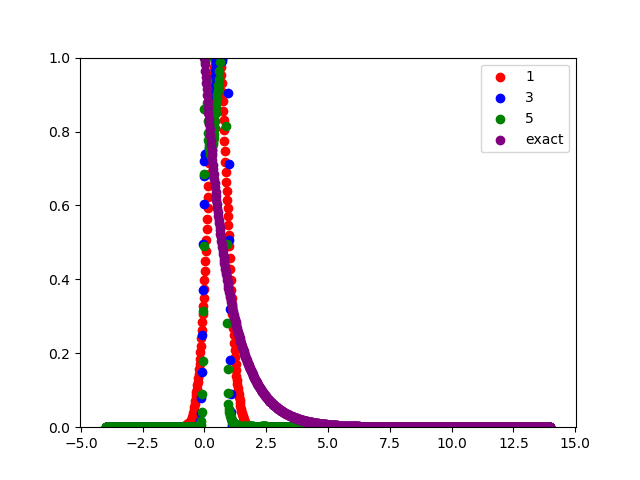

In [66]:
plt.figure()

y_approx1_631=kde(ysample_631[0,:])
y_approx3_631=kde(ysample_631[1,:])
y_approx5_631=kde(ysample_631[2,:])

def y_exact_631(x):
    return np.e**(-x)

x = np.linspace(-4,14,1000)

plt.scatter(x, y_approx1_631(x), c='red', label=1)
plt.scatter(x, y_approx3_631(x),c='blue', label=3)
plt.scatter(x, y_approx5_631(x), c='green', label=5)
plt.scatter(x, y_exact_631(x), c='purple', label='exact')

plt.ylim(0, 1)

plt.legend()

<IPython.core.display.Javascript object>


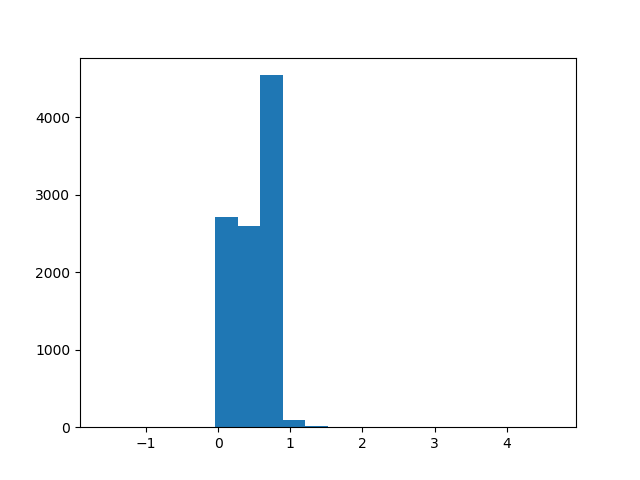

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.719e+03,
        2.600e+03, 4.543e+03, 9.900e+01, 1.300e+01, 6.000e+00, 5.000e+00,
        5.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.60125156, -1.28881727, -0.97638298, -0.66394869, -0.35151439,
        -0.0390801 ,  0.27335419,  0.58578848,  0.89822277,  1.21065706,
         1.52309136,  1.83552565,  2.14795994,  2.46039423,  2.77282852,
         3.08526282,  3.39769711,  3.7101314 ,  4.02256569,  4.33499998,
         4.64743427]),
 <a list of 20 Patch objects>)

In [67]:
plt.figure()
plt.hist(ysample_631[2,:],20)